### Code 4 : KB_AVISO data

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from itertools import islice
import pdb
import time

### [1] Plot digitized segment

B300 (221, 2)


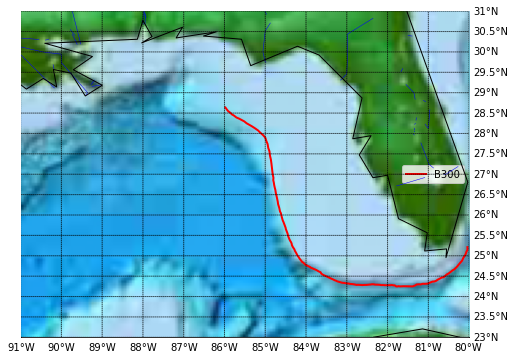

In [2]:
#Draw basemap
Zoom=1
if Zoom==0:
    fig=plt.figure(figsize=(15,5))
    ax=fig.add_subplot(1,1,1)
    ax.map =Basemap(projection='cyl', llcrnrlon=-105.0, llcrnrlat=15.0, urcrnrlon=-70.0, urcrnrlat=35.0)
    ax.map.drawmeridians(np.arange(10.,351.,5.) ,labels=[False,False,False,True],zorder=1)  
    ax.map.drawparallels(np.arange(0.,81,5.),labels=[False,True,False,False],zorder=2) 
elif Zoom==1:
    fig=plt.figure(figsize=(9,6))
    ax=fig.add_subplot(1,1,1)
    ax.map =Basemap(projection='cyl', llcrnrlon=-91.0, llcrnrlat=23.0, urcrnrlon=-80.0, urcrnrlat=31.0)
    ax.map.drawmeridians(np.arange(10.,351.,1.) ,labels=[False,False,False,True],zorder=31)  
    ax.map.drawparallels(np.arange(0.,81,0.5),labels=[False,True,False,False],zorder=32) 
elif Zoom==2:
    fig=plt.figure(figsize=(15,5))
    ax=fig.add_subplot(1,1,1)
    ax.map =Basemap(projection='cyl', llcrnrlon=-86.0, llcrnrlat=25.0, urcrnrlon=-84.0, urcrnrlat=29.0)
    ax.map.drawmeridians(np.arange(10.,351.,1.) ,labels=[False,False,False,True],zorder=1)  
    ax.map.drawparallels(np.arange(0.,81,1.),labels=[False,True,False,False],zorder=2) 


ax.map.etopo(zorder=5)
ax.map.drawrivers(color='b',zorder=14)
ax.map.drawcoastlines(zorder=15)

#Load data
Bathymetry=['B300']
Color=['r']


for bathymetry,color in zip(Bathymetry,Color):
    yxr=np.loadtxt('Input/DigitizeSegments_Bathymetry_raw_{}.csv'.format(bathymetry),delimiter=',',skiprows=1)
    print(bathymetry,yxr.shape)
    ax.map.plot(yxr[:,1], yxr[:,0], marker=None,color=color,linewidth=2,zorder=20, label=bathymetry)
    # yxa=np.loadtxt('DigitizeSegments/Bathymetry_AVISO/{}.csv'.format(bathymetry),delimiter=',',skiprows=1)
    # ax.map.scatter(yxa[:,1], yxa[:,0], marker='.',color='r',zorder=21)
    # print(yxa.shape)
ax.legend()
plt.savefig('Output/test.png')


### [2] AVISO cells for segments

In [3]:
#[1] Load zos data 
path=r'\\wsl$/Ubuntu-20.04/home/aelshall/NCO/FLmap/zos/260W285S_17S35N/data/'
member='AVISO-1-1_phy-001-030_r0'
file=member+'.nc'
zos = xr.open_dataset(path+file).zos

#[2] lat and lon data of two segments from csv files to extract zos values
#Bathymetry=['B300']
bathymetry='B300'
yx=np.loadtxt('Input/DigitizeSegments_Bathymetry_raw_{}.csv'.format(bathymetry),delimiter=',',skiprows=1)

#Extract time series at different locations
data=np.empty([zos.shape[0], len(yx)])
lat_lon=np.empty([len(yx),2])
for n in range(yx.shape[0]):
    lat_lon[n,0]=zos.sel(latitude=yx[n,0], longitude=yx[n,1], method='nearest').coords['latitude'].values
    lat_lon[n,1]=zos.sel(latitude=yx[n,0], longitude=yx[n,1], method='nearest').coords['longitude'].values

#Find unique values (i.e., value every grid cell)    
B_AV,IDX=np.unique(lat_lon,axis=0,return_index=True)
B_AV=[lat_lon[idx] for idx in sorted(IDX)]
np.savetxt('Output/DigitizeSegments_Bathymetry_AVISO_{}.csv'.format(bathymetry),B_AV,delimiter=',')

### [4] Extract zos(AVISO) data for AVISO segments

In [6]:
#[1] Load zos data 
#path=r'\\wsl$/Ubuntu-20.04/home/aelshall/NCO/FLmap/zos/260W285S_17S35N/data/'
path='../Subset_selection/Input/'
member='AVISO-1-1_phy-001-030_r0'
file=member+'.nc'
zos = xr.open_dataset(path+file).zos
#print(zos)

#[2] Load Bathymetry_AVISO data
#Bathymetry=['NOAA','B-50','B-300','B-1000','B-2000','B-3000']
Bathymetry=['B300']
for bathymetry in Bathymetry: 
    yx=np.loadtxt('Output/DigitizeSegments_Bathymetry_AVISO_{}.csv'.format(bathymetry),delimiter=',')

    #Extract time series at different locations
    data=np.empty([zos.shape[0], len(yx)])
    lat_lon=np.empty([len(yx),2])
    for n in range(yx.shape[0]):
        data[:,n]=zos.sel(latitude=yx[n,0], longitude=yx[n,1], method='nearest')

    np.savetxt('Output/zos_segments_data_Bathymetry_{}_{}.csv'.format(bathymetry,member),data,delimiter=',')
    print(data.shape)

(264, 119)
